In [24]:
# full imports go first
import os  # os is a built-in Python library for interacting with the operating system
import requests  # requests is a library for managing requests

# partial imports go below
from bs4 import BeautifulSoup  # add to requirements.txt: beautifulsoup4 - this helps to pull data out of an HTML structure
from PIL import Image  # add to requirements.txt: pillow - used for handling and processing images

# URL of the Pinterest page
URL = "https://www.pinterest.co.uk/tinusor/clothes-that-i-want-to-buy/"



# Pinterest image Scraper Tool

In [25]:
# Step 1: Get the page data
data = requests.get(URL)  # Use the GET function from the requests library to fetch the webpage structure
html_text = data.text  # Convert the fetched data into text (HTML format)
print(html_text[:500])  # Output a snippet of the HTML structure of the page for a quick preview


<!DOCTYPE html><html class="en" lang="en"><head><meta charSet="utf-8"/><meta content="AobcHP0Riuw7qx+GcJ79jLXxzvz+vbYglMh02KHK8du7LYn9e2JLytVX5ABrS3PMoEeAZ5HxTvNW05uVVfni5gEAAAByeyJvcmlnaW4iOiJodHRwczovL3BpbnRlcmVzdC5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcxNjk0MDc5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/><meta content="AllMzOvrkujc7GON8lqELShsMXYhCGr4NJzeeZDbs6qjkoN7uWrwintNbs9SEGAz7KVmsjFywhy3vvyISCzjPgIAAAB0eyJvcmlnaW4iOiJodHRwczovL3d3dy5waW


In [26]:
# Step 2: Parse the HTML
bs_html = BeautifulSoup(html_text, "html.parser")  # Parse the HTML content using BeautifulSoup
print(bs_html.prettify()[:500])  # Print a prettified version of the HTML (snippet)

<!DOCTYPE html>
<html class="en" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="AobcHP0Riuw7qx+GcJ79jLXxzvz+vbYglMh02KHK8du7LYn9e2JLytVX5ABrS3PMoEeAZ5HxTvNW05uVVfni5gEAAAByeyJvcmlnaW4iOiJodHRwczovL3BpbnRlcmVzdC5jb206NDQzIiwiZmVhdHVyZSI6IkxvbmdBbmltYXRpb25GcmFtZVRpbWluZyIsImV4cGlyeSI6MTcxNjk0MDc5OSwiaXNTdWJkb21haW4iOnRydWV9" http-equiv="origin-trial"/>
  <meta content="AllMzOvrkujc7GON8lqELShsMXYhCGr4NJzeeZDbs6qjkoN7uWrwintNbs9SEGAz7KVmsjFywhy3vvyISCzjPgIAAAB0eyJvcmlnaW4iOiJodHRwcz


In [27]:
# Step 3: Find all image tags
image_tags = bs_html.find_all('img')  # Search for all image tags on the page
print(f"Number of image tags found: {len(image_tags)}")  # Print the number of image tags found

# List of accepted image types
accepted_image_types = ['jpg', 'jpeg', 'png', 'bmp', 'webp', 'svg']  # Define acceptable image formats


Number of image tags found: 16


In [28]:
# Step 4: Extract file types
# Extract unique file extensions from the 'src' attributes of each image tag
present_file_types = set(str(img_tag.get('src').split('.')[-1]) for img_tag in image_tags)
print(f"Present file types: {present_file_types}")  # Print the file types that are present on the page

Present file types: {'jpg'}


In [99]:
# Step 5: Collect image URLs and captions
img_urls = []
captions = []

for img_tag in image_tags:
    img_src = img_tag.get('src')
    caption = img_tag.get('alt', 'No caption available')
    
    if img_src:
        img_type = img_src.split('.')[-1]
        if img_type.lower() in accepted_image_types:
            img_urls.append(f'https:{img_src}')
            captions.append(caption)

# Save captions to a file
metadata_file_path = 'metadata.txt'
with open(metadata_file_path, 'w') as f:
    for caption in captions:
        f.write(f"{caption}\n")


In [100]:
# Step 6: Check how many URLs were collected
print(f"Number of collected image URLs: {len(img_urls)}")  # Print the number of collected image URLs
unique_urls = set(img_urls)  # Remove duplicate URLs by converting the list to a set
print(f"Number of unique image URLs: {len(unique_urls)}")  # Print the number of unique URLs


Number of collected image URLs: 16
Number of unique image URLs: 16


In [74]:
# Step 7: Set up a folder to store the images
IMAGES_DIRECTORY = "scraped_images"
if not os.path.exists(IMAGES_DIRECTORY):
    os.mkdir(IMAGES_DIRECTORY)

In [79]:
#  Step 8: Function to clean up URLs
def sanitize_url(url):
    print(f"Raw URL: {url}")  # Print the raw URL before sanitization
    
    # Remove any extra 'https:' or 'http:' 
    if url.startswith('https:https://'):
        return 'https://' + url.split('https:https://')[1]
    elif url.startswith('http:http://'):
        return 'http://' + url.split('http:http://')[1]
    elif url.startswith('https://'):
        return url
    elif url.startswith('http://'):
        return url
    else:
        sanitized = 'https://' + url
        print(f"Sanitized URL: {sanitized}")  # Print the sanitized URL
        return sanitized

# Initialize error list
errors = []


In [80]:
# Step 9: Download and save images
for index, url in enumerate(unique_urls):
    url = sanitize_url(url)
    print(f"Processing URL: {url}")
    try:
        resp = requests.get(url, stream=True)
        if resp.status_code == 200:
            img = Image.open(resp.raw)
            img_type = url.split('.')[-1]
            img.save(f'./{IMAGES_DIRECTORY}/img_{index}.{img_type}')
        else:
            print(f"Failed to fetch image: {url} with status code {resp.status_code}")
            errors.append(url)
    except Exception as e:
        print(f"Error saving image {url}: {e}")
        errors.append(url)


Raw URL: https:https://i.pinimg.com/236x/ab/d9/cb/abd9cb7c7aea627c8b729f3e4cc1b828.jpg
Processing URL: https://i.pinimg.com/236x/ab/d9/cb/abd9cb7c7aea627c8b729f3e4cc1b828.jpg
Raw URL: https:https://i.pinimg.com/236x/3a/63/b3/3a63b3a0afa9f8af13671ef5ad360595.jpg
Processing URL: https://i.pinimg.com/236x/3a/63/b3/3a63b3a0afa9f8af13671ef5ad360595.jpg
Raw URL: https:https://i.pinimg.com/236x/e2/f0/e8/e2f0e8788f8a57f90529d35a2ce03abf.jpg
Processing URL: https://i.pinimg.com/236x/e2/f0/e8/e2f0e8788f8a57f90529d35a2ce03abf.jpg
Raw URL: https:https://i.pinimg.com/236x/7a/23/89/7a238989fd2807a757a5ee77e4974ee3.jpg
Processing URL: https://i.pinimg.com/236x/7a/23/89/7a238989fd2807a757a5ee77e4974ee3.jpg
Raw URL: https:https://i.pinimg.com/236x/e5/03/fe/e503fec9ba9fedceee5f514e2569e564.jpg
Processing URL: https://i.pinimg.com/236x/e5/03/fe/e503fec9ba9fedceee5f514e2569e564.jpg
Raw URL: https:https://i.pinimg.com/236x/e9/de/35/e9de355174a2b6169cde37f7213d9152.jpg
Processing URL: https://i.pinimg.com/2

In [95]:
# Step 10 Print the number of errors and details
print(f"Number of errors: {len(errors)}")
if errors:
    print(f"First error URL: {errors[0]}")
    resp = requests.get(errors[0], stream=True)
    print(f"Status code for the first error URL: {resp.status_code}")

Number of errors: 0


# Analysing the Data from my Pinterest Boards - Word Cloud

In [96]:
# Extract captions if available
captions = [img_tag.get('alt', 'No caption available') for img_tag in image_tags]  # Assuming 'alt' contains captions


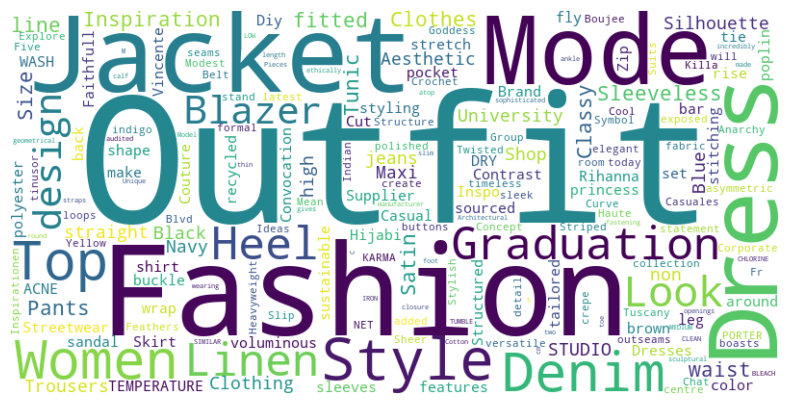

In [101]:
# Step 1 - Used Google to help with this
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load captions from file
with open('metadata.txt', 'r') as file:
    text = file.read()

if text.strip():  # Check if there's any meaningful text to process
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No meaningful text data available for the word cloud.")
